# Tutorial 44: Hierarchical Equal Risk Contribution (HERC) Portfolio Optimization with Constraints

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0256%,0.4057%,0.4036%,1.9692%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9759%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3734%,-1.0857%
2016-01-06,-11.4864%,-1.5879%,0.2411%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9035%,-2.9144%
2016-01-07,-5.1388%,-4.1922%,-1.6572%,-2.7699%,-1.1047%,-1.9769%,-1.2206%,-0.8856%,-4.6058%,-2.5394%,...,-2.2066%,-3.0310%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2844%,-2.0570%,-0.5492%,-3.0020%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1098%,-0.2241%,0.5707%,-1.6402%,-1.7642%,-0.1649%,...,-0.1539%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3838%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,0.1692%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9870%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


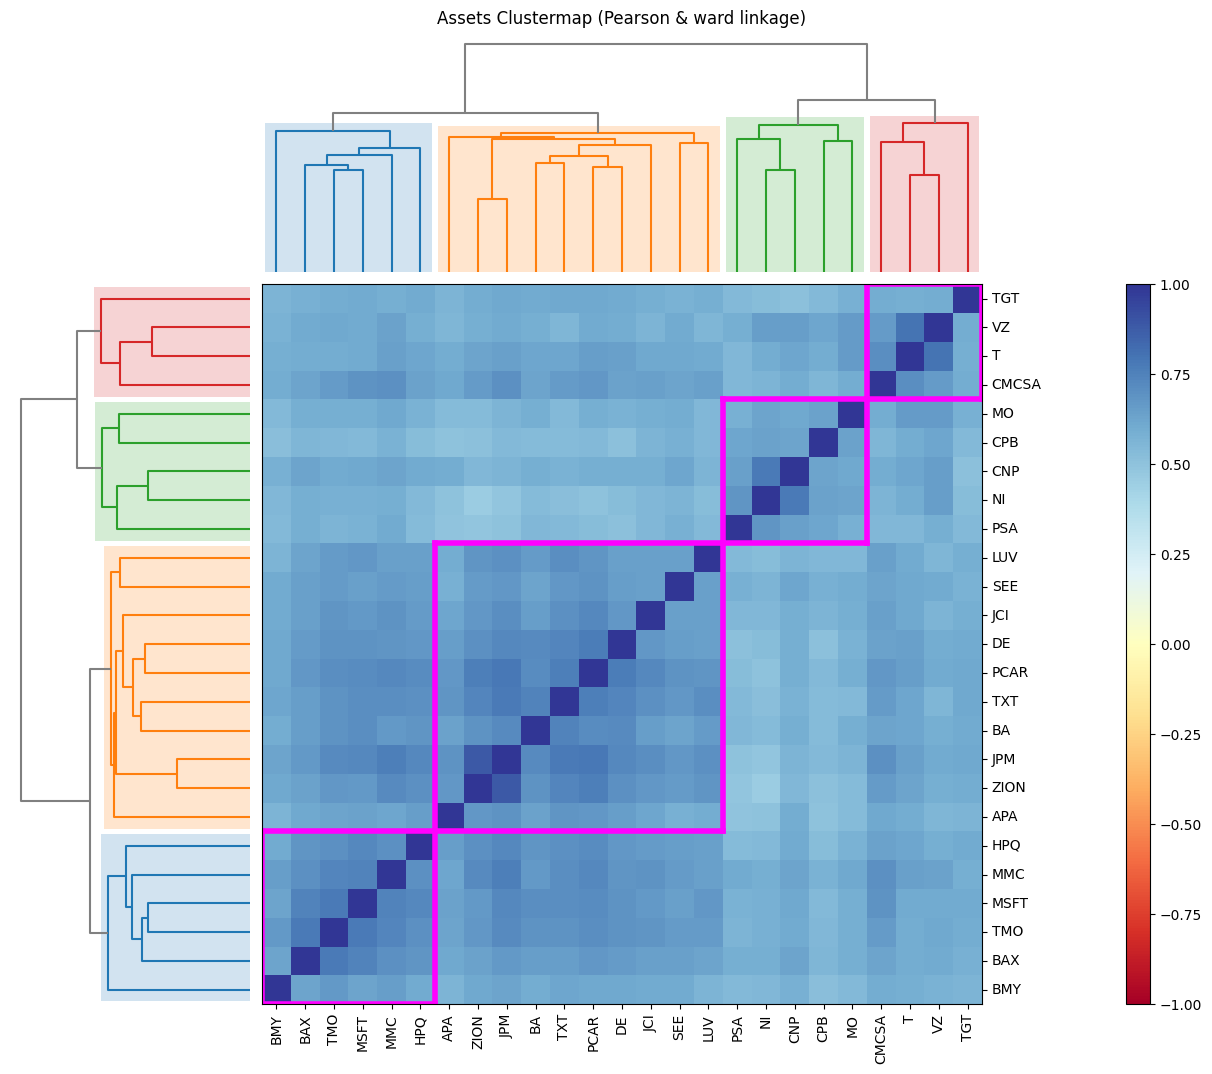

In [3]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_clusters(returns=Y,
                      codependence='pearson',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      #linecolor='tab:purple',
                      ax=None)

## 2. Estimating HERC Portfolio

### Hierarchical Equal Risk Contribution (HERC) 포트폴리오 설명

**Hierarchical Equal Risk Contribution (HERC)** 포트폴리오 모델은 포트폴리오 리스크를 공정하게 분배하고, 자산 간의 상관 관계를 반영하여 리스크를 최소화하는 포트폴리오 최적화 방법입니다. HERC는 자산의 계층적 구조를 기반으로 리스크를 균등하게 분배하여 효율적인 포트폴리오를 구성합니다.

### HERC의 주요 개념

1. **계층적 구조 (Hierarchical Structure)**:
   - 자산 간의 상관 관계를 반영하여 트리 구조를 생성합니다.
   - 트리 구조는 자산을 그룹으로 나누고, 각 그룹 내의 자산들은 서로 유사한 특성을 가집니다.

2. **리스크 균등 기여 (Equal Risk Contribution)**:
   - 각 자산이 포트폴리오 전체 리스크에 기여하는 정도를 균등하게 합니다.
   - 이를 통해 특정 자산에 대한 과도한 리스크 집중을 방지합니다.

3. **계층적 클러스터링 (Hierarchical Clustering)**:
   - 자산을 그룹으로 나누기 위해 계층적 클러스터링 알고리즘을 사용합니다.
   - 일반적으로 상관 행렬을 기반으로 자산 간의 유사성을 계산하여 클러스터링을 수행합니다.

### HERC 포트폴리오 최적화 단계

1. **상관 행렬 계산 (Compute Correlation Matrix)**:
   - 자산 간의 상관 관계를 계산하여 상관 행렬을 만듭니다.

2. **계층적 클러스터링 (Hierarchical Clustering)**:
   - 상관 행렬을 기반으로 자산을 그룹으로 나눕니다.
   - 일반적으로 최단 연결법(single linkage), 완전 연결법(complete linkage), 평균 연결법(average linkage) 등의 방법을 사용합니다.

3. **리스크 균등 기여 (Equal Risk Contribution)**:
   - 각 그룹 내에서 자산의 리스크 기여도를 균등하게 분배합니다.
   - 최적화 알고리즘을 사용하여 각 자산의 가중치를 계산합니다.

### HERC 포트폴리오 최적화 예제 코드

아래는 `Riskfolio-Lib`를 사용하여 HERC 포트폴리오를 최적화하는 예제 코드입니다:

```python
import numpy as np
import pandas as pd
import riskfolio as rp
import matplotlib.pyplot as plt

# 예시 데이터 생성
np.random.seed(42)
Y = np.random.randn(100, 10)  # 100개의 샘플과 10개의 자산
asset_names = [f'Asset {i}' for i in range(1, 11)]
returns = pd.DataFrame(Y, columns=asset_names)

# 포트폴리오 객체 생성
port = rp.HCPortfolio(returns=returns)

# 기대 수익률 및 공분산 행렬 추정
method_mu = 'hist'
method_cov = 'hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# 최적화 매개변수 설정
model = 'HERC'  # 사용할 모델: HERC
codependence = 'pearson'  # 상관 행렬 유형: pearson, spearman, etc.
rm = 'MV'  # 리스크 측정치: MV (Mean-Variance)
obj = 'Sharpe'  # 목표 함수: Sharpe 비율 최대화
rf = 0  # 무위험 이자율
linkage = 'single'  # 계층적 클러스터링 방법
max_k = 10  # 최대 클러스터 수

# 최적 포트폴리오 계산
w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      obj=obj,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k)

# 결과 출력
display(w.T)

# 효율적 프론티어 플롯
ax = rp.plot_frontier(w_frontier=w, mu=port.mu, cov=port.cov, rf=rf, alpha=0.05, cmap='viridis', w=w)

# 플롯 표시
plt.show()
```

### 코드 설명

1. **데이터 준비 및 포트폴리오 객체 생성**:
   ```python
   np.random.seed(42)
   Y = np.random.randn(100, 10)
   asset_names = [f'Asset {i}' for i in range(1, 11)]
   returns = pd.DataFrame(Y, columns=asset_names)
   port = rp.HCPortfolio(returns=returns)
   ```

   - 예시 데이터를 생성하고 자산 이름을 설정합니다.
   - `rp.HCPortfolio` 클래스를 사용하여 HERC 포트폴리오 객체를 생성합니다.

2. **기대 수익률 및 공분산 행렬 추정**:
   ```python
   method_mu = 'hist'
   method_cov = 'hist'
   port.assets_stats(method_mu=method_mu, method_cov=method_cov)
   ```

   - 역사적 데이터를 기반으로 기대 수익률 및 공분산 행렬을 추정합니다.

3. **최적화 매개변수 설정**:
   ```python
   model = 'HERC'
   codependence = 'pearson'
   rm = 'MV'
   obj = 'Sharpe'
   rf = 0
   linkage = 'single'
   max_k = 10
   ```

   - HERC 모델을 사용하고, 상관 행렬 유형을 Pearson 상관계수로 설정하며, Mean-Variance를 리스크 측정치로 사용합니다.
   - 목표 함수를 Sharpe 비율 최대화로 설정하고, 무위험 이자율은 0으로 설정합니다.
   - 계층적 클러스터링 방법으로 최단 연결법(single linkage)을 사용하고, 최대 클러스터 수는 10으로 설정합니다.

4. **최적 포트폴리오 계산**:
   ```python
   w = port.optimization(model=model,
                         codependence=codependence,
                         rm=rm,
                         obj=obj,
                         rf=rf,
                         linkage=linkage,
                         max_k=max_k)
   ```

   - 지정된 매개변수에 따라 HERC 포트폴리오를 최적화합니다.

5. **결과 출력 및 효율적 프론티어 플롯**:
   ```python
   display(w.T)
   ax = rp.plot_frontier(w_frontier=w, mu=port.mu, cov=port.cov, rf=rf, alpha=0.05, cmap='viridis', w=w)
   plt.show()
   ```

   - 최적화된 포트폴리오의 가중치를 출력하고, 효율적 프론티어를 시각화합니다.

### 결론

HERC 포트폴리오 모델은 자산 간의 상관 관계를 반영하여 리스크를 균등하게 분배하고, 효율적인 포트폴리오를 구성하는 방법입니다. 계층적 클러스터링과 리스크 균등 기여를 통해 특정 자산에 대한 과도한 리스크 집중을 방지하고, 포트폴리오의 안정성을 높입니다. 위 예제 코드는 HERC 포트폴리오를 최적화하는 방법을 보여주며, 다양한 투자 전략을 검토하고 실행하는 데 도움이 됩니다.

In [4]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model = 'HERC' # Could be HRP, HERC or NCO
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'ward' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.6423%,1.7310%,4.5531%,2.6465%,5.8394%,7.6405%,3.9025%,1.7334%,2.2530%,2.2505%,...,7.3687%,2.1231%,6.9433%,2.0169%,7.7390%,3.1855%,4.0472%,1.8479%,8.7857%,1.6270%


이 코드는 `Riskfolio-Lib` 라이브러리를 사용하여 Hierarchical Equal Risk Contribution (HERC) 포트폴리오를 최적화하는 예제입니다. 각 단계별로 코드를 설명하겠습니다.

### 코드 설명

1. **포트폴리오 객체 생성**:
   ```python
   port = rp.HCPortfolio(returns=Y)
   ```

   - `rp.HCPortfolio` 클래스를 사용하여 HERC 포트폴리오 객체를 생성합니다.
   - `returns=Y`: 자산의 역사적 수익률 데이터 `Y`를 사용합니다.

2. **최적화 매개변수 설정**:
   ```python
   model = 'HERC'  # 사용할 모델: HERC (Hierarchical Equal Risk Contribution)
   codependence = 'pearson'  # 상관 행렬 유형: 피어슨 상관계수 사용
   rm = 'MV'  # 리스크 측정치: 평균-분산 (Mean-Variance)
   rf = 0  # 무위험 이자율
   linkage = 'ward'  # 클러스터링 방법: 워드 연결법 (Ward's linkage)
   max_k = 10  # 최대 클러스터 수: 두 차이점 통계량에서 사용되는 최대 클러스터 수
   leaf_order = True  # 덴드로그램에서 잎의 최적 순서를 고려할지 여부
   ```

   - `model = 'HERC'`: HERC 모델을 사용하여 포트폴리오를 최적화합니다.
   - `codependence = 'pearson'`: 피어슨 상관계수를 사용하여 자산 간의 상관 관계를 계산합니다.
   - `rm = 'MV'`: 평균-분산을 리스크 측정치로 사용합니다.
   - `rf = 0`: 무위험 이자율을 0으로 설정합니다.
   - `linkage = 'ward'`: 워드 연결법을 사용하여 클러스터를 생성합니다.
   - `max_k = 10`: 두 차이점 통계량에서 사용되는 최대 클러스터 수를 10으로 설정합니다.
   - `leaf_order = True`: 덴드로그램에서 잎의 최적 순서를 고려하도록 설정합니다.

3. **최적 포트폴리오 계산**:
   ```python
   w = port.optimization(model=model,
                         codependence=codependence,
                         rm=rm,
                         rf=rf,
                         linkage=linkage,
                         max_k=max_k,
                         leaf_order=leaf_order)
   ```

   - `port.optimization` 함수를 사용하여 지정된 매개변수에 따라 HERC 포트폴리오를 최적화합니다.
   - `model`, `codependence`, `rm`, `rf`, `linkage`, `max_k`, `leaf_order` 매개변수를 설정하여 최적화를 수행합니다.
   - 최적화된 포트폴리오 가중치 벡터 `w`를 반환합니다.

4. **결과 출력**:
   ```python
   display(w.T)
   ```

   - `display(w.T)` 함수를 사용하여 최적화된 포트폴리오 가중치를 전치하여 보기 좋게 출력합니다.

### 전체 코드

```python
import riskfolio as rp

# 포트폴리오 객체 생성
port = rp.HCPortfolio(returns=Y)

# 최적화 매개변수 설정
model = 'HERC'  # 사용할 모델: HERC (Hierarchical Equal Risk Contribution)
codependence = 'pearson'  # 상관 행렬 유형: 피어슨 상관계수 사용
rm = 'MV'  # 리스크 측정치: 평균-분산 (Mean-Variance)
rf = 0  # 무위험 이자율
linkage = 'ward'  # 클러스터링 방법: 워드 연결법 (Ward's linkage)
max_k = 10  # 최대 클러스터 수: 두 차이점 통계량에서 사용되는 최대 클러스터 수
leaf_order = True  # 덴드로그램에서 잎의 최적 순서를 고려할지 여부

# 최적 포트폴리오 계산
w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

# 결과 출력
display(w.T)
```

이 코드는 HERC 포트폴리오를 최적화하여 리스크를 균등하게 분배하고, 자산 간의 상관 관계를 반영하여 효율적인 포트폴리오를 구성하는 방법을 보여줍니다. 워드 연결법을 사용하여 클러스터를 생성하고, 피어슨 상관계수를 사용하여 자산 간의 상관 관계를 계산합니다. 최적화된 포트폴리오 가중치를 계산하고 출력하여 최적의 투자 전략을 확인할 수 있습니다.

### 2.2 Plotting portfolio composition

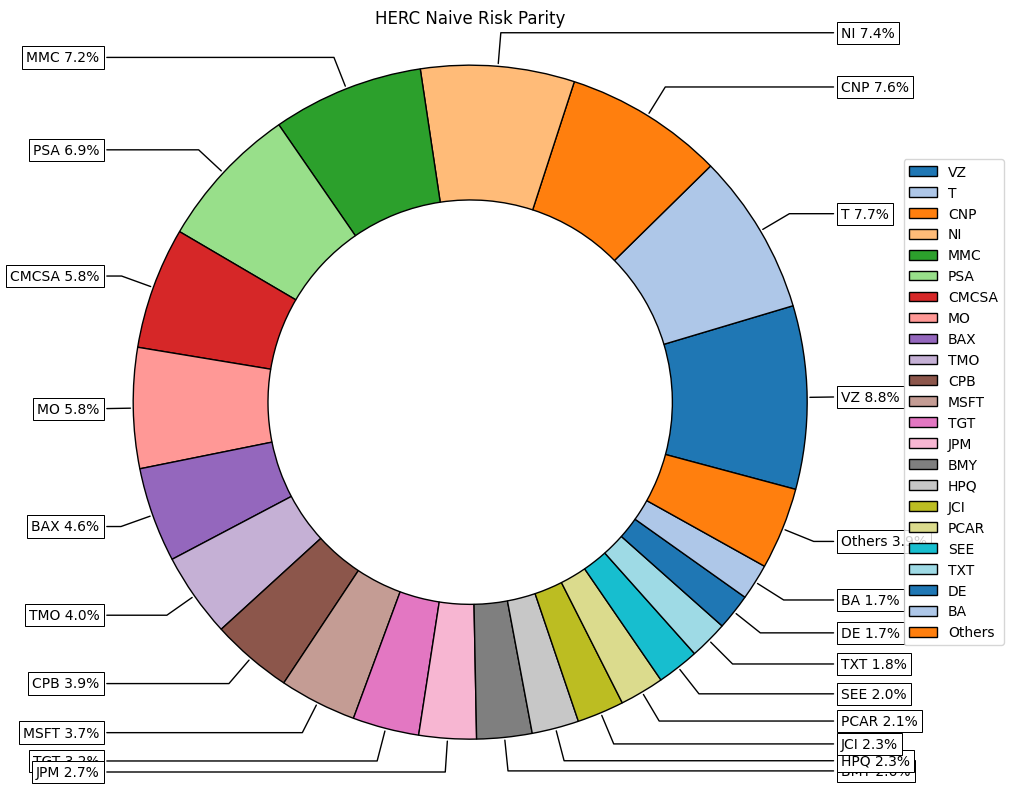

In [5]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='HERC Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

### 2.3 Plotting Risk Contribution

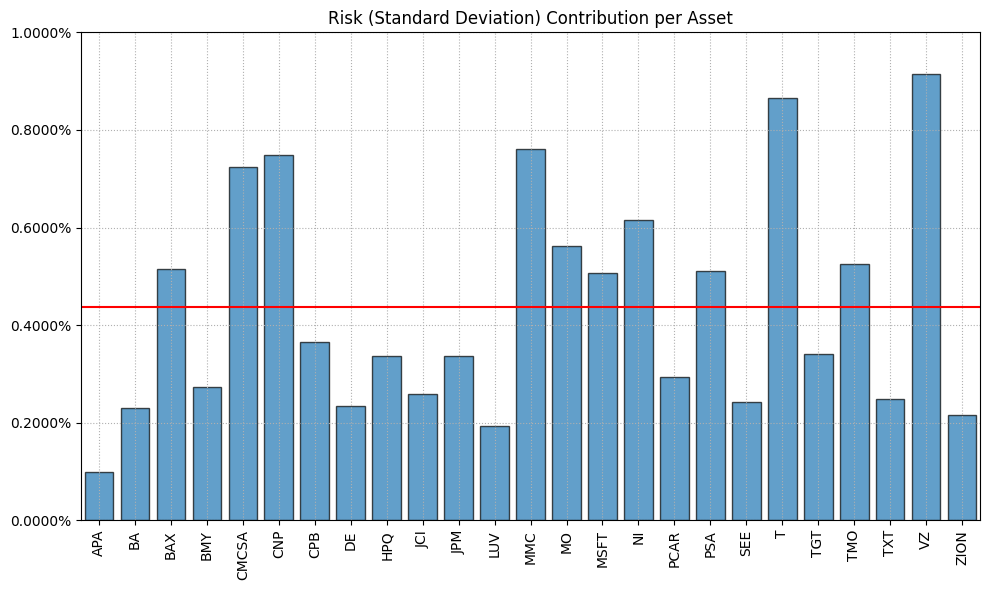

In [6]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

## 3. Estimating HERC Portfolio with Constraints

### 3.1 Building the HERC portfolio constraints

In [7]:
asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False, False, False],
               'Type': ['Assets', 'Assets', 'All Assets', 
                        'Each asset in a class', 'Each asset in a class'],
               'Set': ['', '', '','Industry', 'Industry'],
               'Position': ['HPQ', 'PSA', '', 'Financials', 'Information Technology'],
               'Sign': ['>=', '<=', '<=', '<=', '<='],
               'Weight': [0.01, 0.05, 0.06, 0.04, 0.02]}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight
0,False,Assets,,HPQ,>=,1.0000%
1,False,Assets,,PSA,<=,5.0000%
2,False,All Assets,,,<=,6.0000%
3,False,Each asset in a class,Industry,Financials,<=,4.0000%
4,False,Each asset in a class,Industry,Information Technology,<=,2.0000%


### 3.2 Calculating the HERC portfolio with constraints

In [8]:
# Estimate optimal portfolio with constraints:

w_max, w_min = rp.hrp_constraints(constraints, asset_classes)

port.w_max = w_max
port.w_min = w_min

w_1 = port.optimization(model=model,
                        codependence=codependence,
                        rm=rm,
                        rf=rf,
                        linkage=linkage,
                        max_k=max_k,
                        leaf_order=leaf_order)

display(w_1.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,1.0005%,2.6963%,6.0000%,3.6632%,6.0000%,6.0000%,4.4953%,2.7001%,2.0000%,3.5054%,...,6.0000%,3.3070%,4.0000%,3.1416%,6.0000%,3.8936%,5.6020%,2.8783%,6.0000%,2.5342%


### 3.3 Plotting portfolio composition

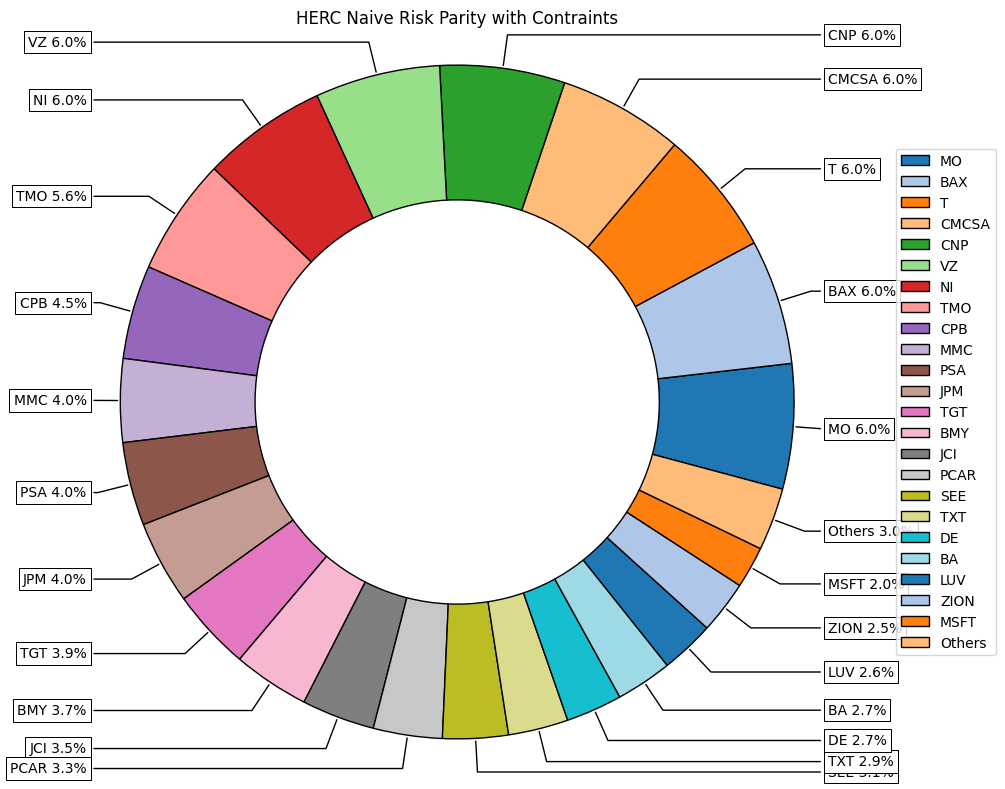

In [9]:
# Plotting the composition of the portfolio with constraints

ax = rp.plot_pie(w=w_1,
                 title='HERC Naive Risk Parity with Contraints',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

### 3.4 Plotting Risk Contribution

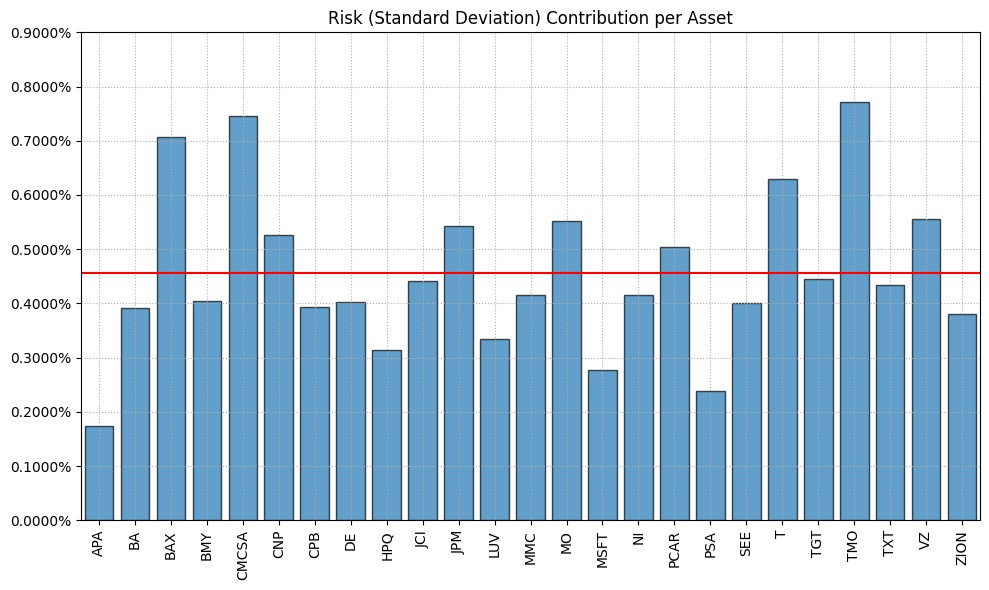

In [10]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w_1,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)